In [28]:
import sys
sys.path.insert(0, '../scripts/')


from ruler.measures.cwl_rbp import RBPCWLMetric
from ruler.measures.cwl_inst import INSTCWLMetric
from ruler.measures.cwl_bpm import BPMDCWLMetric

class Ranking(object):
    def __init__(self, topic_id, gains, costs):
        self.topic_id = topic_id
        self.gains = gains
        self.costs = costs



In [5]:
g1 = [ 1,0,1,1,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t1 = Ranking("T1",g1,c1)


In [6]:
rbp = RBPCWLMetric(theta=0.9)
rbp.measure(t1)
rbp.report()

T1	RBP@0.9	0.3501	3.5009	1.0000	10.0000	10.0000


In [15]:
print(rbp.c_vector(g1))

[ 0.30872059  0.21610441  0.15127309  0.10589116  0.07412381  0.05188667
  0.03632067  0.02542447  0.01779713  0.01245799]


In [16]:
print(rbp.w_vector(g1))

[ 0.30872059  0.21610441  0.15127309  0.10589116  0.07412381  0.05188667
  0.03632067  0.02542447  0.01779713  0.01245799]


In [23]:
inst = INSTCWLMetric(T=1)
inst.measure(t1)
inst.report()

T1	INST-T=1    	0.7934	1.1719	1.0000	1.4770	1.4771


In [24]:
print(inst.c_vector(g1))

[ 0.25        0.44444444  0.44444444  0.44444444  0.5625      0.64        0.64
  0.69444444  0.69444444  0.73469388]


In [25]:
print(inst.w_vector(g1))

[ 0.68320211  0.17080053  0.07591135  0.03373838  0.01499483  0.00843459
  0.00539814  0.00345481  0.00239917  0.00166609]


In [31]:
bpm = BPMDCWLMetric(T=3)
bpm.measure(t1)
bpm.report()

T1	BPM-Dynamic-T=3-K=10-hb=1.0-hc=1.0	0.5714	4.0000	1.0000	7.0000	7.0000


Populating the interactive namespace from numpy and matplotlib


/Users/leif/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


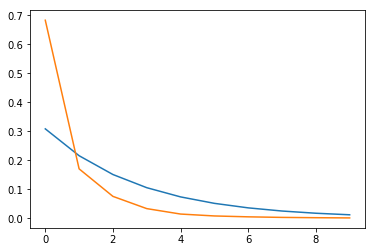

In [26]:
import pylab
%pylab inline

pylab.plot(rbp.w_vector(g1))
pylab.plot(inst.w_vector(g1))
pylab.plot(bpm.w_vector(g1,c1))


